# Feature Selection

In a dataset, not every feature might be useful. Some could be noise, and some could show a strong relationship with the target variable. Often, using all the features decreases a model's performance and increases training time. Therefore, it's wisest to select the best subset of features that are relevant to the target variable before we train a model. This process is called feature selection. 

With supervised learning, feature selection has 3 main categories.

1. Filter method
2. Wrapper method
3. Embedded method

In this tutorial, we will go over what those 3 categories are, what methods are under the 3 categories, and how to implement those with sklearn. So let's first bring in datasets from the sklearn package.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes, load_breast_cancer
# Preparing regression dataset
diabetes = load_diabetes(as_frame=True)
X_reg, y_reg = diabetes.data, diabetes.target
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=0
)
# Preparing classification dataset
breast_cancer = load_breast_cancer(as_frame=True)
X_clf, y_clf = breast_cancer.data, breast_cancer.target
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=0
)

In [2]:
# Example rows of regression dataset
X_reg_train.head(4)

age       sex       bmi        bp        s1        s2        s3  \
74   0.012648  0.050680  0.002417  0.056301  0.027326  0.017162  0.041277   
26  -0.107226 -0.044642 -0.077342 -0.026328 -0.089630 -0.096198  0.026550   
45   0.027178  0.050680 -0.035307  0.032201 -0.011201  0.001504 -0.010266   
389 -0.005515  0.050680  0.001339 -0.084856 -0.011201 -0.016658  0.048640   

           s4        s5        s6  
74  -0.039493  0.003709  0.073480  
26  -0.076395 -0.042571 -0.005220  
45  -0.002592 -0.014960 -0.050783  
389 -0.039493 -0.041176 -0.088062

In [3]:
# Example rows of classification dataset
X_clf_train.head(4)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
338        10.05         17.53           64.41      310.8          0.10070   
427        10.80         21.98           68.79      359.9          0.08801   
406        16.14         14.86          104.30      800.0          0.09495   
96         12.18         17.84           77.79      451.1          0.10450   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
338           0.07326         0.02511              0.01775         0.1890   
427           0.05743         0.03614              0.01404         0.2016   
406           0.08501         0.05500              0.04528         0.1735   
96            0.07057         0.02490              0.02941         0.1900   

     mean fractal dimension  ...  worst radius  worst texture  \
338                 0.06331  ...         11.16          26.84   
427                 0.05977  ...         12.76          32.04   
406                 0.05875  ...         17.71          19.58   
96                  0.06635  ...         12.83          20.92   

     worst perimeter  worst area  worst smoothness  worst compactness  \
338            71.98       384.0            0.1402            0.14020   
427            83.69       489.5            0.1303            0.16960   
406           115.90       947.9            0.1206            0.17220   
96             82.14       495.2            0.1140            0.09358   

     worst concavity  worst concave points  worst symmetry  \
338           0.1055               0.06499          0.2894   
427           0.1927               0.07485          0.2965   
406           0.2310               0.11290          0.2778   
96            0.0498               0.05882          0.2227   

     worst fractal dimension  
338                  0.07664  
427                  0.07662  
406                  0.07012  
96                   0.07376  

[4 rows x 30 columns]

## 1. Filter methods

Filter methods involve testing and selecting features based on univariate statistical tests on predictor variables or relationships between predictor and target variables. Thus, they tend to be fast and less computationally expensive than the other two methods. However, they usually fail to find the best subset of features and give small model improvements.

Several techniques are
1. Quasi Constant
2. Pearson's Correlation Coefficient
3. Spearman's Rank Correlation
4. ANOVA F-test
5. Chi-Square Test
6. Mutual Information

### 1.1. Quasi Constant

A Quasi constant feature is a feature for which the majority of the observations display the same value. If all or most of the values are the same, it won't be useful for prediction. So after you set a minimum threshold for variance, you remove features based on whether their variances exceed the threshold or not. 

You can implement this with VarianceThreshold() from sklearn.feature_selection. By default, the threshold is 0. Thus, it will remove a feature only if it contains the same value for every observation. You can change the threshold into a float number such as 0.001. Then, it will remove features if 99.9% of their values are the same.

In [4]:
from sklearn.feature_selection import VarianceThreshold
# Adding a constant column
X_reg_constant = X_reg.copy()
X_reg_constant['constant'] = np.zeros(X_reg_constant.shape[0])
# Removing columns that has lower than 0.001 variance
selector = VarianceThreshold(threshold=0.001)
X_fs = selector.fit_transform(X_reg_constant)
print(f"Original X shape: {X_reg_constant.shape}")
print(f"After variance threshold: {X_fs.shape}\n--------")
print(f"Removed feature: {X_reg_constant.columns[~selector.get_support()].values}")

Original X shape: (442, 11)
After variance threshold: (442, 10)
--------
Removed feature: ['constant']


### 1.2. Pearson's Correlation Coefficient

Pearson's correlation coefficient measures the linear relationship between two continuous variables. Its value ranges from -1 to 1 with -1 indicating a perfect negative linear relationship, +1 indicating a perfect positive linear relationship, and 0 indicating no linear relationship at all. Since there is no hard cutoff for Pearson's correlation, it's best to look at a distribution of values and decide the threshold for yourself.

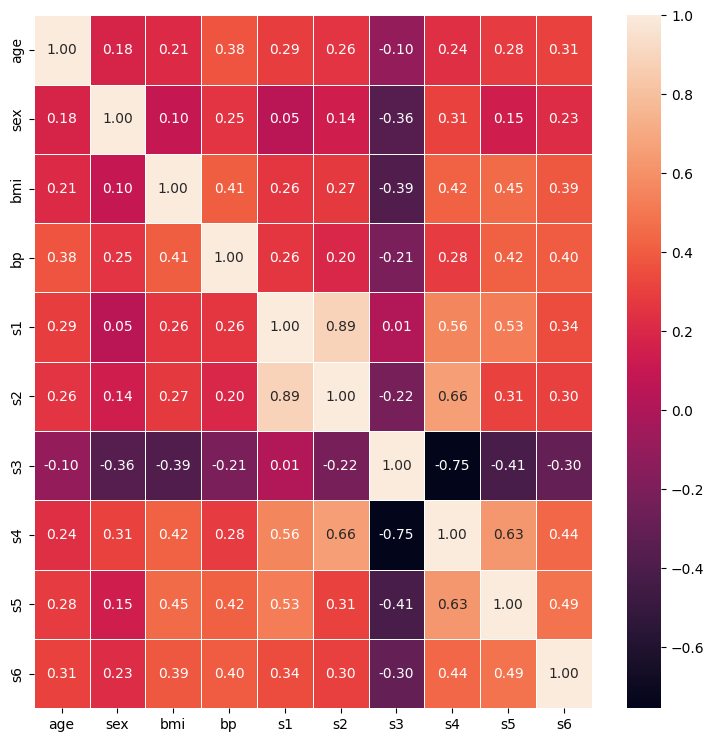

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = X_reg_train.corr(method="pearson")
plt.figure(figsize=(9, 9))
sns.heatmap(corr_matrix, linewidth=0.5, annot=True, fmt='.2f')
plt.show()

However, there are limitations to Pearson's correlation. 

First, it can only capture a linear relationship. But oftentimes, you encounter variables with non-linear relationships. In that case, you have to use other correlations. 

Second, it assumes that variables are normally distributed. So when you have highly skewed variables, Pearson's correlation might not do a good job on them.

### 1.3. Spearman's Rank Correlation

One of the correlations that you can use when you have non-linear relationships is Spearman's rank correlation. It measures the strength and direction of how two variables are associated, no matter whether it's linear or not. 

Just like Pearson's correlation, its value ranges from -1 to +1 with each end indicating a perfect association. Also, there is no cutoff for what is considered as strong or weak. Therefore, plotting a heatmap and determining a threshold might be a good approach.

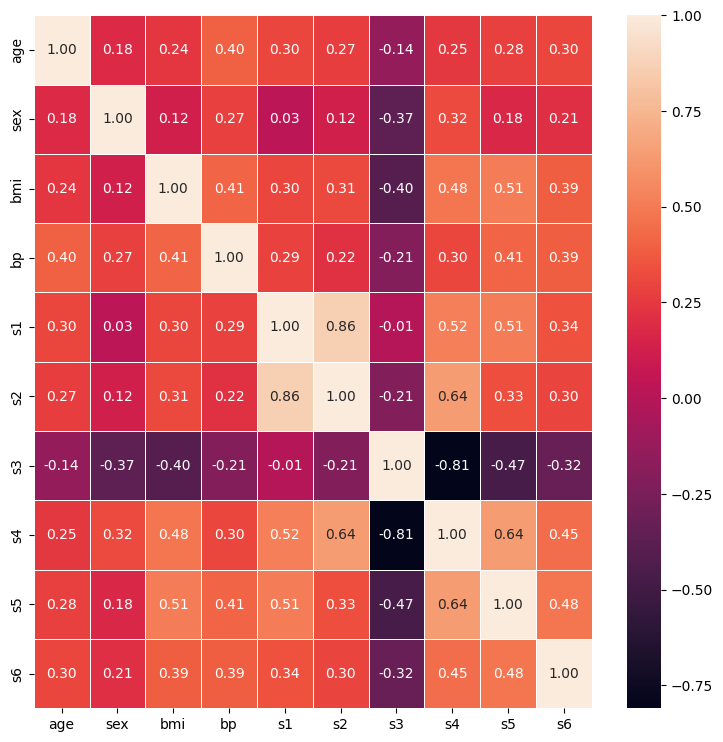

In [6]:
corr_matrix = X_reg_train.corr(method="spearman")
plt.figure(figsize=(9, 9))
sns.heatmap(corr_matrix, linewidth=0.5, annot=True, fmt='.2f')
plt.show()

However, Spearman's rank correlation has its own limitations too. 

First, variables need to be continuous or at least ordinal. This means it won't work when nominal categorical variables are given. 

Second, a variable must have monotonic relationships with other variables.

### Selecting features using score_func

Another way to filter features is by scoring each feature with a univariate statistical test and selecting features based on the score whether with a fixed number or percentile of features. With sklearn, you can implement this selection process with either SelectKBest() or SelectPercentile(). Both methods take score_func as a parameter. The first kind of score_func we will look at is ANOVA.

### 1.4. ANOVA f-test

ANOVA stands for Analysis of Variance. So using variances, ANOVA f-test determines whether means from two different samples come from the same distribution or not. Then, it ranks each feature from the highest to lowest with a higher score meaning a feature impacting the target variable more than other features. So in the end, this method selects features that have higher scores. One thing to note is that it is used when one variable is numerical and one is categorical, such as classification with continuous predictors.

In [7]:
from sklearn.feature_selection import f_classif, SelectKBest
# Selecting top 10 features
fs = SelectKBest(score_func=f_classif, k=10)
X_fs = fs.fit_transform(X_clf_train, y_clf_train)
print(f"Selected features: {fs.get_feature_names_out()}\n")
print(f"Shape of X_fs: {X_fs.shape}")

Selected features: ['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concavity' 'worst concave points']

Shape of X_fs: (455, 10)


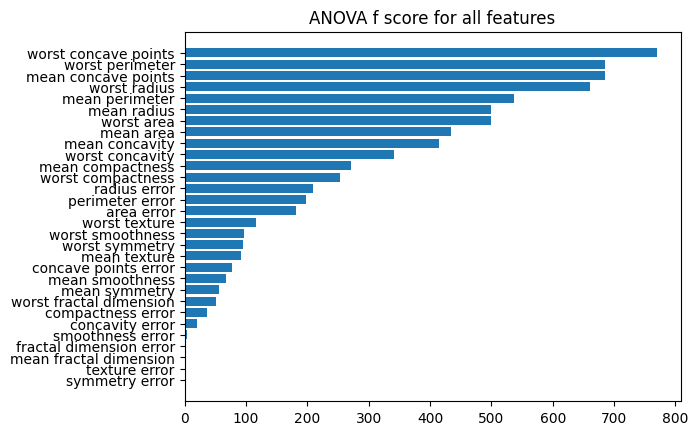

In [8]:
# Plotting scores for all features
fs = SelectKBest(score_func=f_classif, k="all")
fs.fit(X_clf_train, y_clf_train)
result = pd.DataFrame(
    data={"score": fs.scores_, "fea": X_clf_train.columns}
).sort_values(by="score")
plt.barh(result['fea'], result['score'])
plt.title("ANOVA f score for all features")
plt.show()

### 1.5. Chi-Square test

Another score function you can use is a chi-square test. But unlike the ANOVA f-test, the chi-square test only works when both predictor and target variables are categorical. 

The basic idea of the chi-square test is removing features that are independent of the target variable. This means if an observed count of a feature is similar to an expected count, it considers the feature is independent of the target variable and gives a smaller chi-square value. So in a later step, you can disregard features with low scores. 

With sklearn, you can implement this by passing chi2 as the score_func parameter.

In [9]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile
# Binning continuous variables to make it categorical
X_clf_bin = X_clf.copy()
for col, values in X_clf_bin.items():
    X_clf_bin[col] = pd.cut(X_clf_bin[col], bins=10, labels=np.arange(1, 11, 1))
X_cb_train, X_cb_test, y_cb_train, y_cb_test = train_test_split(
    X_clf_bin, y_clf, test_size=0.2, random_state=0
)
# Selecting top 25% features
fs = SelectPercentile(score_func=chi2, percentile=25)
X_fs = fs.fit_transform(X_cb_train, y_cb_train)
print(f"Selected features: {fs.get_feature_names_out()}\n")
print(f"Shape of X_fs: {X_fs.shape}")

Selected features: ['mean area' 'mean concavity' 'mean concave points' 'worst radius'
 'worst perimeter' 'worst area' 'worst concavity' 'worst concave points']

Shape of X_fs: (455, 8)


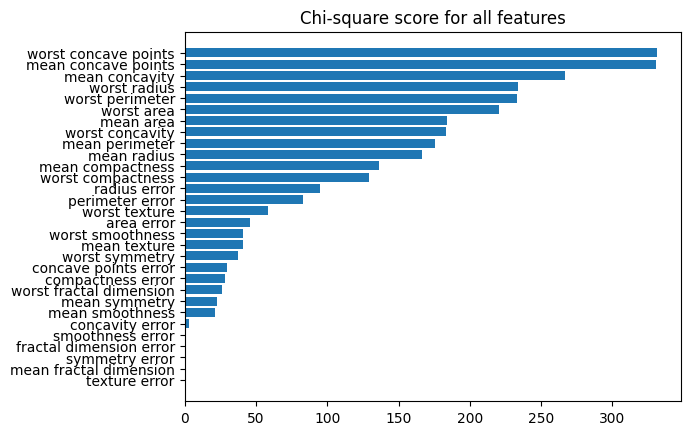

In [10]:
# Plotting scores for all features
result = pd.DataFrame(
    data={"score": fs.scores_, "fea": X_cb_train.columns}
).sort_values(by="score")
plt.barh(result['fea'], result['score'])
plt.title("Chi-square score for all features")
plt.show()

### 1.6. Mutual Information

The last score_func is mutual information, and it measures the amount of information gained about one variable by knowing a value for another variable. Thus, it's measuring how two variables are dependent on each other.

For instance, when you roll a die twice, knowing what you get on your first roll does not help you to guess what you will get on your second roll. Thus, there is no mutual information. But when you draw a card from a deck, knowing the result of your first try helps you to guess your second try. Thus, there is some mutual information in it.

Using this information, it scores each variable. Then, with the score, you decide either to keep or disregard each variable. And it works for both classification and regression with mutual_info_classif and mutual_info_regression.

In [11]:
from sklearn.feature_selection import mutual_info_classif
# Selecting top 10 features
fs = SelectKBest(score_func=mutual_info_classif, k=10)
X_fs = fs.fit_transform(X_clf_train, y_clf_train)
print(f"Selected features: {fs.get_feature_names_out()}\n")
print(f"Shape of X_fs: {X_fs.shape}")

Selected features: ['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'area error' 'worst radius' 'worst perimeter'
 'worst area' 'worst concave points']

Shape of X_fs: (455, 10)


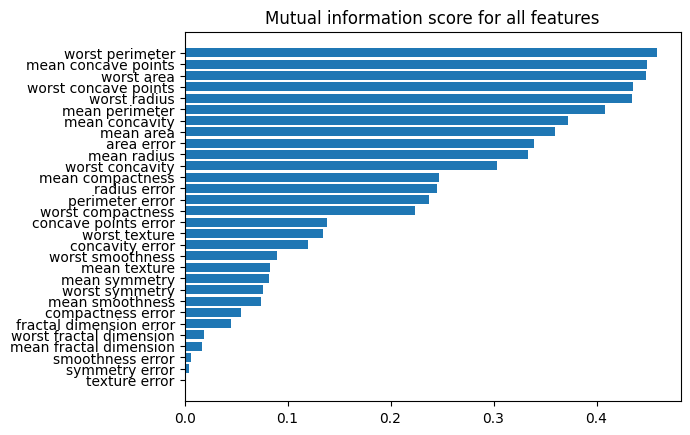

In [12]:
# Plotting scores for all features
result = pd.DataFrame(
    data={"score": fs.scores_, "fea": X_clf_train.columns}
).sort_values(by="score")
plt.barh(result['fea'], result['score'])
plt.title("Mutual information score for all features")
plt.show()

In [13]:
from sklearn.feature_selection import mutual_info_regression
# Selecting top 5 features
fs = SelectKBest(score_func=mutual_info_regression, k=5)
X_fs = fs.fit_transform(X_reg_train, y_reg_train)
print(f"Selected features: {fs.get_feature_names_out()}\n")
print(f"Shape of X_fs: {X_fs.shape}")

Selected features: ['bmi' 's1' 's4' 's5' 's6']

Shape of X_fs: (353, 5)


## 2. Wrapper methods
Wrapper methods train a model with a subset of features and only include features that increase the model's performance in its final selection. This is done iteratively since it requires exploring every possible choice. Thus, it's usually computationally expensive. 

Several techiques are
1. Forward Selection
2. Backward Selection
3. Recursive Feature Eliminiation (RFE)
4. Recursive Feature Elimination with Cross Validation (RFECV)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn_evaluation import plot

### 2.1. Forward Selection
Forward selection starts training a model with no feature. Then, it goes over all the features to find the 1 best feature to add. It repeats this until cross-validation score improvement by adding a feature does not exceed a tolerance level or a desired number of features are selected.

```Python
from sklearn.feature_selection import SequentialFeatureSelector

rfc = RandomForestClassifier()
forward_select = SequentialFeatureSelector(
    rfc, direction='forward', n_features_to_select="auto"
)
forward_select.fit(X_clf_train, y_clf_train)
features = forward_select.get_feature_names_out()
rfc.fit(X_clf_train[features], y_clf_train)
plot.feature_importances(rfc)
```

### 2.2. Backward Selection

You can think of backward selection as a reverse of forward selection. It starts from all features and iteratively removes 1 feature at a time that is the least significant. And just like forward selection, it repeats until the cv score improvement by removing a feature does not exceed a tolerance level or it's left with a desired number of features.

```Python
backward_select = SequentialFeatureSelector(
    rfc, direction='backward', n_features_to_select="auto"
)
backward_select.fit(X_clf_train, y_clf_train)
features = backward_select.get_feature_names_out()
rfc.fit(X_clf_train[features], y_clf_train)
plot.feature_importances(rfc)
```

### 2.3. Recursive Feature Elimination

For recursive feature elimination (RFE), you first need to specify the number of features you want to select. Then, starting from all features, RFE recursively removes the least significant feature until it reaches the number you set. 

So it works similarly to backward selection. Starts from all and decreases the number of features. The difference is that while backward selection uses cross-validation scores to choose what to remove, RFE uses a feature ranking system.

```Python
from sklearn.feature_selection import RFE
rfc_rfe = RFE(rfc, n_features_to_select=10)
rfc_rfe.fit(X_clf_train, y_clf_train)
features = rfc_rfe.get_feature_names_out()
rfc.fit(X_clf_train[features], y_clf_train)
plot.feature_importances(rfc)
```

### 2.4. RFE with Cross Validation (RFECV)

However, often you don't know how many features are relevant to the response variable in advance. So to find the best number of features, RFECV combines RFE and cross-validation to score different feature subsets and select the best one.

```Python
from sklearn.feature_selection import RFECV
rfc_rfecv = RFECV(rfc)
rfc_rfecv.fit(X_clf_train, y_clf_train)
features = rfc_rfecv.get_feature_names_out()
rfc.fit(X_clf_train[features], y_clf_train)
plot.feature_importances(rfc)
```

## 3. Embedded method

Embedded method uses algorithms that have their own feature selection methods. They are usually faster than wrapper methods and more accurate than filter methods.

Several popular techiques are
1. Lasso
2. Ridge
3. Random Forest Importance

### 3.1. Lasso

Lasso stands for Least Absolute Shrinkage and Selection Operator, and its other name is L1 regularization. For regularization, it minimizes the following equation.

$$
\sum Squared\space Residual + \lambda \sum |coefficient|
$$

From the equation above, $\lambda$ denotes the amount of shrinkage. When $\lambda = 0$, it means no shrinkage is applied. Thus, it will be equivalent to linear regression. As $\lambda$ value increases, it means it will apply more shrinkage to features. Thus, it selects fewer variables. And because $\lambda$ is multiplied by the sum of the absolute value of coefficients, some irrelevant variables' coefficients can shrink to zero.

With sklearn, you can implement this with Lasso class from sklearn.linear_model, and `alpha` parameter is where you pass the $\lambda$ value.

In [15]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_reg_train, y_reg_train)
lasso_reg.coef_

array([  -0.        , -164.61625659,  558.36555241,  244.76051418,
       -105.69577721,   -0.        , -219.76901071,    0.        ,
        533.34127569,    7.38360623])

### 3.2. Ridge

Ridge is another type of regularization that is also called as L2 regularization, and it minimizes the following equation.

$$
\sum Squared \space Residual + \lambda \sum coefficient^2
$$

As in Lasso, $\lambda$ value stands for how much shrinkage you are going to apply. But notice that the coefficients are now squared instead of taking the absolute value. Because of this change, coefficients are now only getting close to zero but not equal to zero. Thus, in terms of model interpretability, Lasso is better than Ridge because you can clearly know what features are irrelevant with 0 coefficients.

In [16]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_reg_train, y_reg_train)
ridge_reg.coef_

array([ -18.93029239, -205.95750389,  520.88560398,  278.43533926,
        -81.8776638 , -108.96163394, -209.97654965,  117.75990964,
        457.61641721,   69.00373659])

### 3.3. Random Forest Importance

A split in a decision tree model is based on how much variance for a continuous target or impurity for a categorical target it can reduce. Random forest importance method uses this information to measure feature importance. When random forest training is completed, it calculates how much each feature decreases impurity on average over all trees. Then, it converts those values so that they add up to 1 and represent relative contributions to the performance. Based on this feature importance score, you choose what to add and disregard.

<Axes: title={'center': 'Feature importances'}>

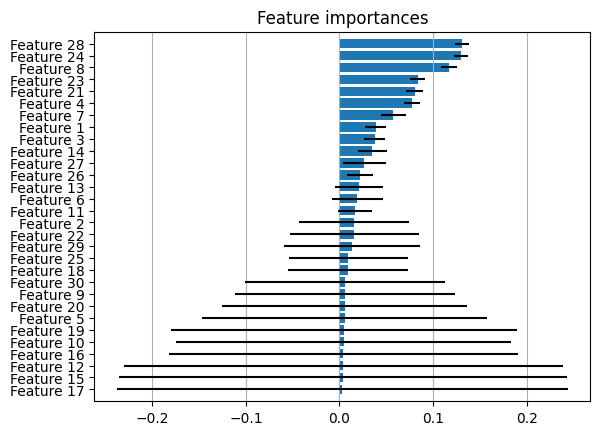

In [17]:
rfc = RandomForestClassifier()
rfc.fit(X_clf_train, y_clf_train)
plot.feature_importances(rfc)